In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
data=pd.read_csv('titanic.csv')


Saving titanic.csv to titanic.csv


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data['Age'].fillna(data['Age'].mean(), inplace=True)



In [ ]:
data=data.drop(columns='Cabin')



In [ ]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['Sex']=encoder.fit_transform(data['Sex'])

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
x, y = data['Sex'].values[:,np.newaxis], data['Survived'].values
train_x, test_x, train_y, test_y = train_test_split(x, y, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=40)

In [ ]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(train_x, train_y)
y_pred=log.predict(test_x)
print("Accuracy={:.2f}".format(log.score(test_x,test_y)))

Accuracy=0.80


In [ ]:
confusion_matrix=pd.crosstab(test_y,y_pred,rownames=['Actual'],colnames=['Predicted'])
print(confusion_matrix)

Predicted   0   1
Actual           
0          88  15
1          20  56


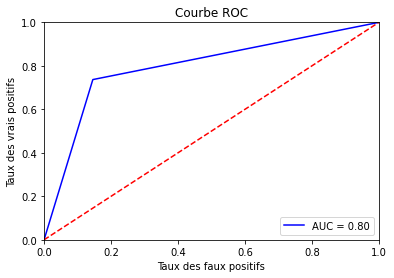

In [ ]:
from sklearn.metrics import precision_recall_curve
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
probs = log.predict_proba(test_x)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(test_y, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Courbe ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Taux des vrais positifs')
plt.xlabel('Taux des faux positifs')
plt.show()

***ROC :*** 

The ROC curve plots the rate of true positives as a function of the rate of false positives.
An ROC curve plots the TVP and TFP values ​​for different classification thresholds. Decreasing the value of the classification threshold makes it possible to classify more elements as positive, which increases the number of false positives and true positives.

***AUC :***
AUC means "area under the ROC curve".
AUC can be interpreted as a measure of probability for the model to classify a random positive example above a random negative example.